# Homework 4: Functions, Groups, and Joins

**Reading**: 

* [Visualizing Numerical Distributions](https://inferentialthinking.com/chapters/07/2/Visualizing_Numerical_Distributions.html) 
* [Functions and Tables](https://inferentialthinking.com/chapters/08/Functions_and_Tables.html)

**Throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook!** For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Moreover, please be sure to only put your written answers in the provided cells. 


**Deadline:**

This assignment is due Wednesday, September 15 at 5:00 PM. Late work will penalized as stated in the syllabus.

In [1]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## 1. Burrito-ful San Diego

Tam, Margaret and Winifred are trying to use Data Science to find the best burritos in San Diego! Their friends Irene and Maya provided them with two comprehensive datasets on many burrito establishments in the San Diego area taken from (and cleaned from): https://www.kaggle.com/srcole/burritos-in-san-diego/data

The following cell reads in a table called `ratings` which contains names of burrito restaurants, their Yelp rating, Google rating, as well as their Overall rating. It also reads in a table called `burritos_types` which contains names of burrito restaurants, their menu items, and the cost of the respective menu item at the restaurant.

In [5]:
#Just run this cell
ratings = Table.read_table("ratings.csv")
ratings.show(5)
burritos_types = Table.read_table("burritos_types.csv")
burritos_types.show(5)

Name,Yelp,Google,Overall
Albertacos,3.5,3.9,3.45
Burrito Factory,4.5,4.8,3.5
Burros and Fries,3.5,4.1,3.575
Caliente Mexican Food,3.5,4.4,3.25
California Burrito Company,3.5,4.4,3.2


Name,Menu_Item,Cost
Albertacos,California,5.7
Albertacos,Carne asada,5.25
"Alberto's 623 N Escondido Blvd, Escondido, CA 92025",Carne Asada,4.59
Burrito Box,Steak with guacamole,11.5
Burrito Factory,Steak everything,7.35


**Question 1.1.** It would be easier if we could combine the information in both tables. Assign `burritos` to the result of joining the two tables together.

<!--
BEGIN QUESTION
name: q1_1
-->

In [6]:
burritos = ratings.join('Name', burritos_types, 'Name')
burritos.show(5)

Name,Yelp,Google,Overall,Menu_Item,Cost
Albertacos,3.5,3.9,3.45,California,5.7
Albertacos,3.5,3.9,3.45,Carne asada,5.25
Burrito Factory,4.5,4.8,3.5,Steak everything,7.35
Burros and Fries,3.5,4.1,3.575,California,7.19
Burros and Fries,3.5,4.1,3.575,Carne asada,6.89


**Question 1.2.** Let's look at how the Yelp scores compare to the Google scores in the `burritos` table. First, assign `yelp_and_google` to a table only containing the columns `Yelp` and `Google`. Then, make a scatter plot with Yelp scores on the y-axis and the Google scores on the x-axis. 

<!--
BEGIN QUESTION
name: q1_2
manual: True
-->
<!-- EXPORT TO PDF -->

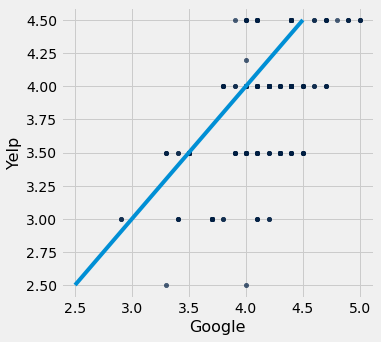

In [7]:
yelp_and_google = burritos.select('Yelp',  'Google')
yelp_and_google.scatter('Google', 'Yelp')
# Don't change/edit/remove the following line.
# To help you make conclusions, we have plotted a straight line on the graph (y=x)
plt.plot(np.arange(2.5,5,.5), np.arange(2.5,5,.5));

**Question 1.3.** Looking at the scatter plot you just made in Question 1.2, do you notice any pattern(s) (i.e. is one of the two types of scores consistently higher than the other one)? If so, describe them **briefly** in the cell below.

<!--
BEGIN QUESTION
name: q1_3
manual: True
-->
<!-- EXPORT TO PDF -->

*The Google rating tends to be higher than the Yelp rating.*

**Question 1.4**. Winifred thinks California `burritos` are the best type of burritos, and wants to see the overall rating for all restaurants that sell any type of California burritos (i.e. California, California Chicken, oaxocalifornia, etc...). Create a table that has two columns: the name of the restaurants that sell any type of California burrito (only one row per restaurant) and the overall rating for that restaurant.

*Tip: Revisit the burritos table to see how all types of California burritos are represented.*

*Note: you can break up the solution into multiple lines, as long as you assign the final output table to `california_burritos`! 

<!--
BEGIN QUESTION
name: q1_4
-->

In [25]:
california_burritos = burritos.with_column('Menu_Item', np.char.lower(burritos.column('Menu_Item'))).where('Menu_Item', are.containing('california')).group(['Name', 'Overall']).select('Name', 'Overall')
california_burritos

Name,Overall
Albertacos,3.45
Burros and Fries,3.575
Caliente Mexican Food,3.25
California Burrito Company,3.2
California Burritos,4.1
Cancun Mexican & Seafood,4.1
Cortez Mexican Food,3.2
Cotixan,3.6
Don Carlos Taco Shop,3.3
Donato's taco shop,3.8


**Question 1.5**. Given this new table `california_burritos`, Winifred can figure out the name of the restaurant with the highest overall rating that sells any type of California burritos! Assign `best_restaurant` to a line of code that evaluates to a string that corresponds to the name of the restaurant with the highest overall rating that sells any type of California burritos.

<!--
BEGIN QUESTION
name: q1_5
-->

In [20]:
best_restaurant = california_burritos.sort('Overall', descending = True).column('Name').item(0)
best_restaurant

'Mikes Taco Club'

## 2. Faculty salaries


This exercise is designed to give you practice using the Table methods `pivot` and `group`. 

In the next cell, we load a dataset created by the [Daily Cal](http://projects.dailycal.org/paychecker/) which contains Berkeley faculty, their departments, their positions, and their gross salaries in 2015.

In [2]:
raw_profs = Table.read_table("faculty.csv").where("year", are.equal_to(2015)).drop("year", "title")
profs = raw_profs.relabeled("title_category", "position")
profs

name,department,position,gross_salary
CYNTHIA ABAN,South & Southeast Asian Studies,lecturer,64450
PIETER ABBEEL,Computer Science,associate professor,184998
SALLY ABEL,Law,lecturer,3466
ELIZABETH ABEL,English,professor,138775
DOR ABRAHAMSON,Education,associate professor,100300
KATHRYN ABRAMS,Law,professor,319693
BARBARA ABRAMS,Public Health,professor,191162
SARAH ACCOMAZZO,Social Welfare,lecturer,14779
CHARISMA ACEY,City and Regional Planning,assistant professor,101567
DAVID ACKERLY,Biology,professor,182288


**Question 2.1.** Set `prof_names` to a table with two columns. The first column should be called `position` and have the name of every position once, and the second column should be called `faculty` with each row in that second column containing an *array* of the names of all faculty members in that position. 

*Hint:* Think about how ```group``` works: it collects values into an array and then applies a function to that array. We have defined two functions below for you, and you will need to use one of them in your call to ```group```.

<!--
BEGIN QUESTION
name: q2_1
-->

In [29]:
# Pick one of the two functions defined below in your call to group.
def identity(array):
    '''Returns the array that is passed through'''
    return array 

def first(array):
    '''Returns the first item'''
    return array.item(0)

# Make a call to group using one of the functions above when you define prof_names

prof_names = Table().with_columns(
    'position', profs.group('position').column('position'),
    'faculty', profs.group('position', identity).column('name identity')
)
prof_names

position,faculty
assistant professor,['CHARISMA ACEY' 'HILLEL ADESNIK' 'MOHAMMAD-REZA ALAM' ' ...
associate professor,['PIETER ABBEEL' 'DOR ABRAHAMSON' 'SABRINA AGARWAL' 'JEN ...
lecturer,['CYNTHIA ABAN' 'SALLY ABEL' 'SARAH ACCOMAZZO' 'ANINDITA ...
professor,['ELIZABETH ABEL' 'KATHRYN ABRAMS' 'BARBARA ABRAMS' 'DAV ...


**Question 2.2.** Set `department_averages` to a table containing departments as the rows, and the position as the columns. The values in the rows should correspond to the average salary for each position in that department. 


<!--
BEGIN QUESTION
name: q2_3
manual: false
-->

In [49]:
department_averages = profs.pivot('position', 'department', values = 'gross_salary', collect = np.mean)
department_averages

department,assistant professor,associate professor,lecturer,professor
African American Studies,81667,112473,50814.5,160600
Agricultural and Resource Economics and Policy,0,0,16062,224717
Anthroplogy,82853.3,103638,22395.5,179707
Architecture,106775,119617,21712.6,135233
Art History,67757.5,111002,39497.5,145254
Art Practice,145758,102823,27953.3,153850
Astronomy,144746,162346,14826,225148
Bioengineering,143346,153478,103840,190724
Biology,144972,140522,60914.9,191715
Buddhist Studies,0,0,53555,0
